# DSCI 100 Group Project Report

Team: Nicolas Mercuri, Tayler Whitehead

## Part 1: Introduction

Music plays a huge role in our experience of the world around us. Daily tasks like walking through campus, working on homework assignments, or simply cooking dinner after a long day, are a lot more enjoyable while listening to your favourite playlist.

For our group project this semester, we decided to work with a dataset called [Spotify Tracks DB](https://tinyurl.com/3dnwcpe2). This dataset was downloaded from Kaggle.com and was parsed using Spotify's official API. The dataset has over 110,000 unique observations (tracks) and features 18 relevant variables, each describing a specific qualitative or quantitative characteristic of a track.

For our predictive question, we are asking if specific quantitative characteristics of a track (danceability, energy, tempo) can help predict a new song's popularity on the music streaming service, Spotify.

While we acknowledge that there is also an array of qualitative factors that contribute to a song's popularity such as culture, seasonality, and personal preference, and therefore must not be dismissed, these qualitative factors affect a song's popularity following its release (Lee & Lee, 2018). Our analysis, then, offers the opportunity to explore how quantitative variables can potentially play a role in predicting the popularity of a song before its initial release. 

Idea for Phase #2: Conduct regression analyses with two predictive variables to see which results in the smallest RSME.

# Methods + Results

First, we load any necessary packages required for our data cleaning and wrangling, analyses, and visualizations.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(RColorBrewer)

options(repr.plot.width= 30, repr.plot.height= 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

We then read in our chosen dataset from our GitHub repository. In order to ensure that our analyses are reproducible, we used the set.seed function (set to an arbritrary number) to generate the same random selection of data throughout our analysis to maintain consistent results.

In [2]:
set.seed(2022)

spotify_raw_data = read_csv("https://raw.githubusercontent.com/chrislukita/DSCI100-Group-Final/main/data/SpotifyDataset.csv")

Parsed with column specification:
cols(
  genre = col_character(),
  artist_name = col_character(),
  track_name = col_character(),
  track_id = col_character(),
  popularity = col_double(),
  acousticness = col_double(),
  danceability = col_double(),
  duration_ms = col_double(),
  energy = col_double(),
  instrumentalness = col_double(),
  key = col_character(),
  liveness = col_double(),
  loudness = col_double(),
  mode = col_character(),
  speechiness = col_double(),
  tempo = col_double(),
  time_signature = col_character(),
  valence = col_double()
)

Warning message:
“1 parsing failure.
   row col   expected     actual                                                                                             file
115177  -- 18 columns 15 columns 'https://raw.githubusercontent.com/chrislukita/DSCI100-Group-Final/main/data/SpotifyDataset.csv'
”


As our dateset is quite sizable, we decided to cut our data in half to 50,000 observations. This will enable our analysis to minimize wasted time processesing code while still maintaining a considerable amount of information for training and testing our regression model.

In [3]:
random_spotify = slice_sample(spotify_raw_data, n = 50000)

After cutting our data set, we perform some data wrangling to select only our desired columns (popularity, danceability, and energy), as well as omitting any "NA" values that may interfere with our data analysis. These steps help clean up the data by removing any values that are unnecessary for our particular analysis.

In [4]:
spotify_wrangled = random_spotify %>%
                    select(popularity, danceability, energy) %>%
                    na.omit(spotify_wrangled)
spotify_wrangled

popularity,danceability,energy
<dbl>,<dbl>,<dbl>
88,0.553,0.502
52,0.450,0.840
56,0.414,0.267
61,0.544,0.446
64,0.704,0.558
51,0.549,0.888
50,0.470,0.988
39,0.722,0.763
49,0.395,0.977


In [5]:
# spotify_wrangled = spotify_wrangled %>%
#                     mutate(popular = popularity >= 65) %>%
#                     mutate(popular = as.factor(popular))

# levels(spotify_wrangled$popular)[2] <- 'Yes'
# levels(spotify_wrangled$popular)[1] <- 'No'

^guess we can delete hey?

In [6]:
# options(repr.plot.width= 15, repr.plot.height= 10)

# spotify_really_small = slice_sample(spotify_wrangled, n = 1000)

# popularity_plot = spotify_really_small %>%
#                 ggplot(aes(x = energy, y = danceability
#                            , color = popular)) + 
#                 geom_point()

# popularity_plot

^dang and this haha

In [7]:
spotify_split = initial_split(spotify_wrangled, prop = 0.75, strata = popularity)

spotify_train = training(spotify_split)
spotify_test = testing(spotify_split)

In [8]:
# spotify_proportions = spotify_train %>%
#             group_by(popular) %>%
#             summarize(n = n()) %>%
#             mutate(percent = 100*n/nrow(spotify_train))

# spotify_proportions

^prob delete as well?

**Tuning model to find best K value using two predictors**

Here we create our model's recipe using the training data set, where we inidicate the response variable and the desired predictors. In the recipe we also scale and center the data so that the values are being compared using relative scales and metrics to avoid  one or more variables exhibiting disproportionate influence on the model's outputs.

In [9]:
spotify_recipe <- recipe(popularity ~ danceability + energy, data = spotify_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())

spotify_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Next, we create the model specifications using the knn algorithm for regression which predicts the response variable's value based on the values of neighbouring points. Since, we want to find the optimal value of neighbours that reduce's our model's RMSE, we set neighbours to "tune()" while we continue to train the model.

In [18]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("regression")

In [29]:
spotify_vfold <- vfold_cv(spotify_train, v = 5, strata = popularity)

gridvals = tibble(neighbors = seq(from = 1, to = 20, by = 3))

In [30]:
spotify_results <- workflow() %>%
                      add_recipe(spotify_recipe) %>%
                      add_model(knn_tune) %>%
                      tune_grid(resamples = spotify_vfold, grid = gridvals) %>%
                      collect_metrics()

In [31]:
spotify_rmse <- spotify_results %>% 
        filter(.metric == "rmse") 

spotify_rmse2 = spotify_rmse %>%
            filter(mean == min(mean))

Plot accuracies vs. K

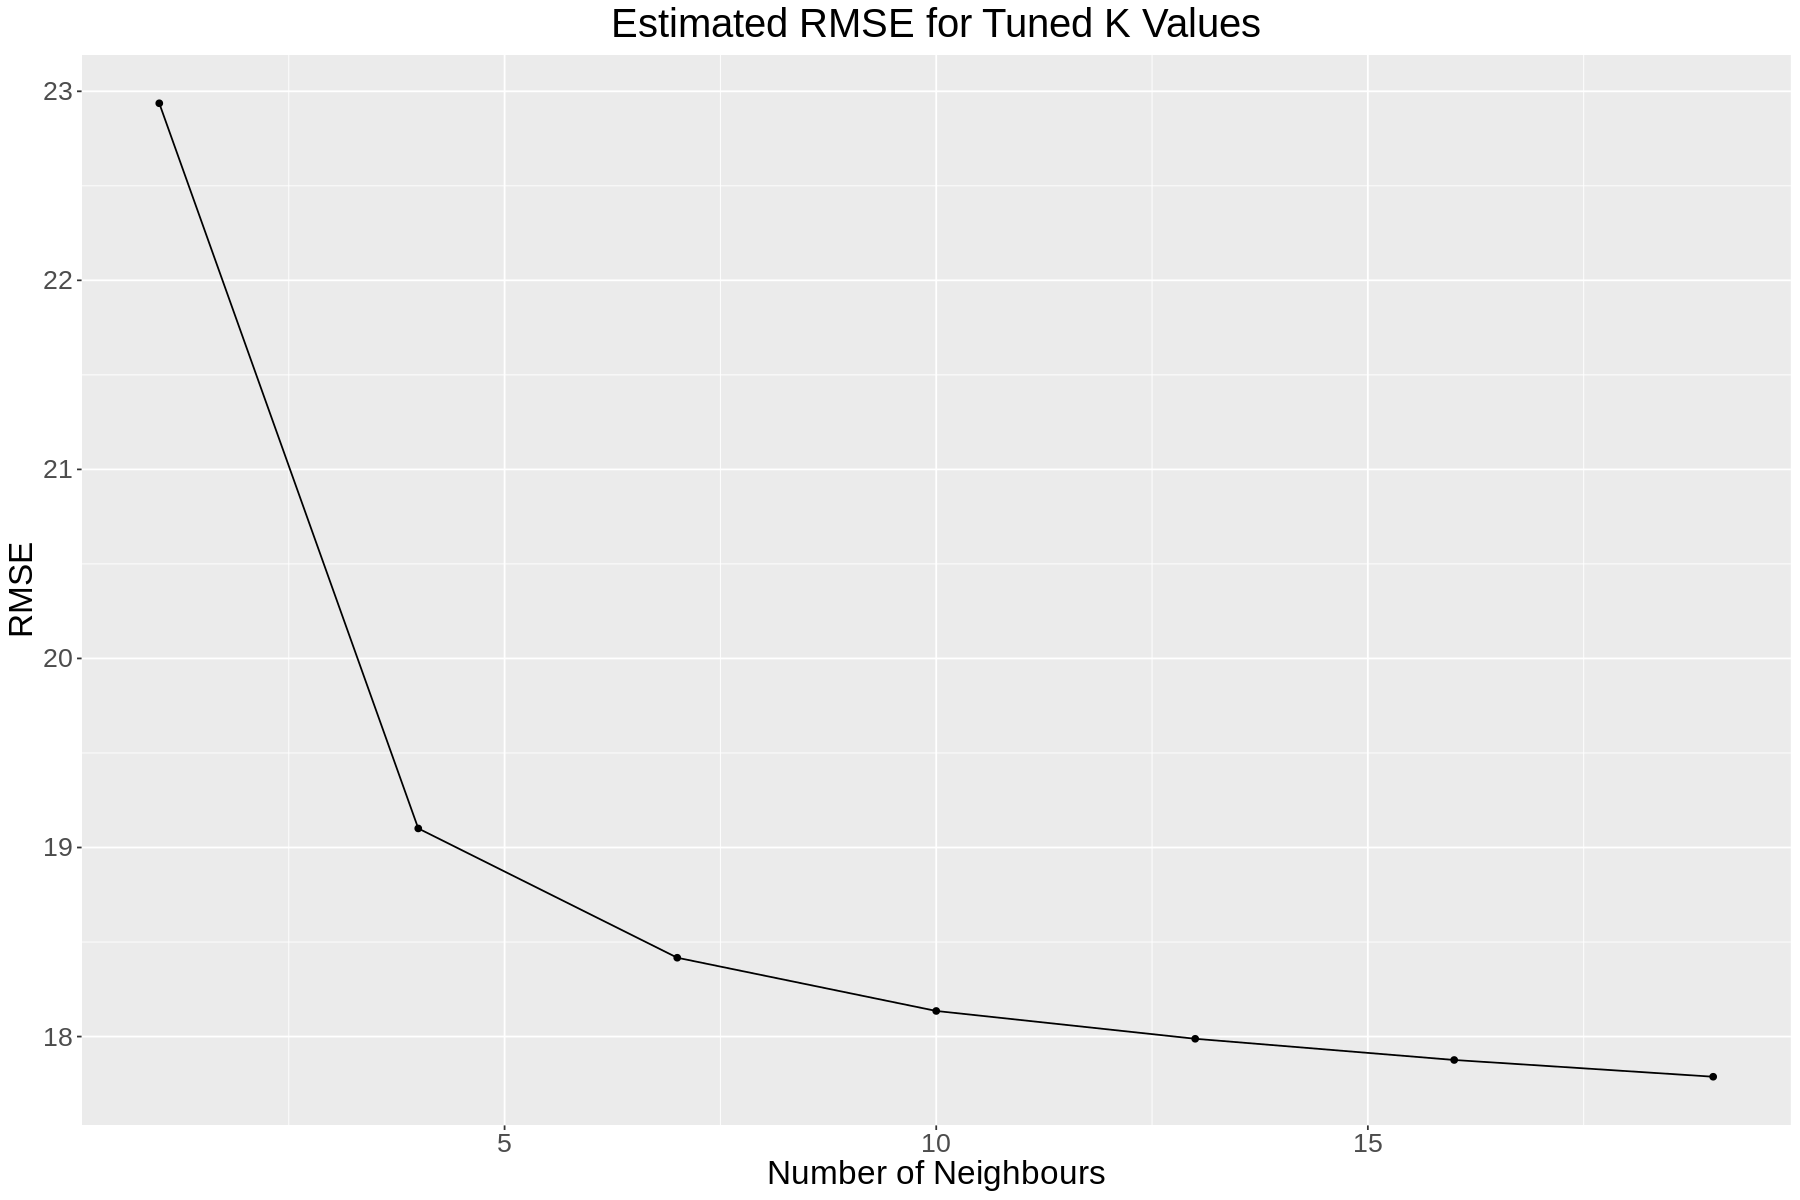

In [32]:
options(repr.plot.width= 15, repr.plot.height= 10)

accuracies_plot = spotify_rmse %>% 
                ggplot(aes(x = neighbors, y = mean)) + 
                geom_point() +
                geom_line() + 
                labs(x = "Number of Neighbours", y = "RMSE") +
                ggtitle("Estimated RMSE for Tuned K Values") + 
                theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20)) 

accuracies_plot

**I didn't change anything past this point**

Working with 19 neighbours

In [41]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) %>%
            set_engine("kknn") %>%
            set_mode("regression")

knn_fit = workflow() %>%
            add_recipe(spotify_recipe) %>%
            add_model(knn_spec) %>%
            fit(data = spotify_train)

spotify_predicted = predict(knn_fit, spotify_test) %>%
                bind_cols(spotify_test) %>%
                metrics(truth = popularity, estimate = .pred) %>%
                filter(.metric == "rmse") 

spotify_predicted

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,17.74012
